In [3]:
import numpy as np
import random as rd

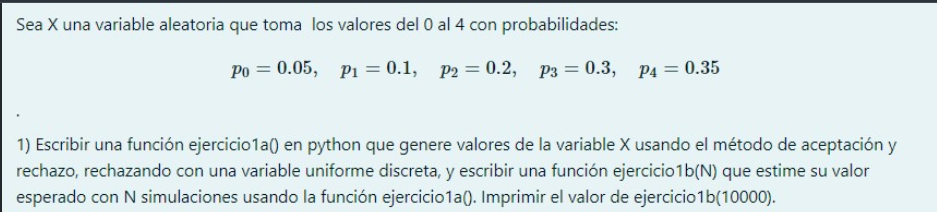

Para poder utilizar aceptacion y rechazo en este caso debo encontrar la cota c tal que:
$$
\frac{p_X(z)}{p_Y(z)} \leq c
$$

Como en este caso la variable Y sera una uniforme discreta con valores del 1 al 5, entonces la cota queda:

$$
\frac{p_X(z)}{1/5} \leq c \rightarrow 5p_X(z) \leq c \\
\text{Y tomara mayor valor en el maximo de p(x) = 0.35} \\
5\cdot 0.35 \leq c \rightarrow c = 1.75
$$

Y luego:
$$
\frac{p_X(z)}{1.75 \cdot 1/5} = \frac{5p_X(z)}{1.75} 
$$

In [4]:
prob_X = [0.05, 0.1, 0.2, 0.3, 0.35]

In [5]:
def ejercicio1a(probs):
    while True:
        y = rd.randint(0, 4)
        u = rd.random()
        if u < 5*probs[y]/1.75:
            return y

def ejercicio1b(nsism, probs): 
    sum = 0
    for i in range(nsism):
        sum += ejercicio1a(probs)
    return sum/nsism

In [6]:
esp_arechazo = ejercicio1b(10000, prob_X)

print(f"Esperanza usando rechazo = {esp_arechazo}")

Esperanza usando rechazo = 2.8121


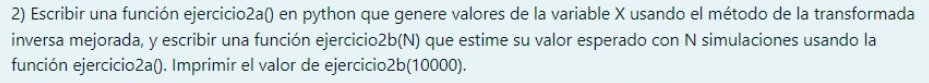

para hacer la inversa mejorada, debo ordenar de mayor a menor las probabilidades. 

In [7]:
prob_X_ord = [(0, 0.05), 
              (1, 0.1), 
              (2, 0.2), 
              (3, 0.3), 
              (4, 0.35)]

# lo ordeno por probabilidad de mayor a menor 
prob_X_ord.sort(key=lambda x: x[1], reverse=True)
# de modo que si quiero el valor 4, le corresponde el indice 0
print(prob_X_ord)

[(4, 0.35), (3, 0.3), (2, 0.2), (1, 0.1), (0, 0.05)]


In [8]:
def ejercicio2a(probs):
    acum = 0
    u = rd.random()
    for i in range(len(probs)):
        acum += probs[i][1]
        if u < acum:
            return probs[i][0]

def ejercicio2b(nsism, probs):
    sum = 0
    for i in range(nsism):
        sum += ejercicio2a(probs)
    return sum/nsism

In [9]:
esp_tinversa = ejercicio2b(10000, prob_X_ord)

print(f"Esperanza usando transformada inversa = {esp_tinversa}")

Esperanza usando transformada inversa = 2.7926


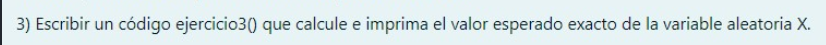

In [10]:
def ejercicio3(probs):
    # calcula la esperanda de la variable discreta
    esp = 0
    for i in range(len(probs)):
        esp += probs[i]*i
    return esp

In [11]:
print(f"Esperanza = {ejercicio3(prob_X)}")

Esperanza = 2.8


In [146]:
def ej():
    u = rd.random()
    if u < 0.22:
        return 1
    elif u < 0.55:
        return 2
    elif u < 0.72:
        return 3
    elif u < 0.9999:
        return 4
    else:
        return 100
    

sims = [ej() for i in range(100000)]

print(f"Esperanza = {np.mean(sims)}")
print(f"Varianza = {np.var(sims)}")

values , probs = np.unique(sims, return_counts=True) 

print(values, probs)

Esperanza = 2.51662
Varianza = 2.3868037755999993
[  1   2   3   4 100] [22048 33176 16994 27770    12]
